## Pré-configs gerais

In [ ]:
pip install transformers torch scikit-learn pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# from google.colab import drive
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertModel
from transformers import BertTokenizer

import matplotlib.pyplot as plt
import pandas as pd
import random
import re
import torch

c:\Users\Vinicius\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Base de dados



### Importando a base de dados

In [ ]:
# drive.mount('/content/drive')

In [ ]:
df = pd.read_excel("C:/Users/Vinicius/Desktop/Pojeto_final/pojeto/dados_artigos.xlsx")

df.head()

,referencia,autor,titulo,ano
0,Sheldon Katz. Rational curves on calabi-yau th...,"Katz, Sheldon",Rational Curves on Calabi-Yau Threefolds,1992
1,Sheldon Katz and David R. Morrison. Gorenstein...,"Katz, Sheldon and Morrison, David R.",Gorenstein Threefold Singularities with Small ...,1992
2,Yun-Gang Ye. Complex contact threefolds and th...,"Ye, Yun-Gang",Complex Contact Threefolds and Their Contact C...,1992
3,Sheldon Katz. Rational curves on calabi-yau th...,"Katz, Sheldon",Rational Curves on Calabi-Yau Threefolds,1992
4,Sheldon Katz and David R. Morrison. Gorenstein...,"Katz, Sheldon and Morrison, David R.",Gorenstein Threefold Singularities with Small ...,1992


In [ ]:
len(df)

52314

### Tratamento de dados

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        # Removendo caracteres especiais em cada célula da coluna
        df[column] = df[column].apply(lambda x: re.sub(r'[^\w\s-]', '', str(x)) if not pd.isna(x) else x)

In [ ]:
linha = df.iloc[238]

# Verificando se uma linha que havia caracteres especiais ainda os possui
print(linha)

referencia    Wolfram Decker and Sorin Popescu On surfaces i...
autor                          Decker Wolfram and Popescu Sorin
titulo                      On surfaces in P4 and 3-folds in P5
ano                                                        1994
Name: 238, dtype: object


In [ ]:
remove_arxiv = re.compile(r' arXiv.*')
df['referencia'] = df['referencia'].apply(lambda x: re.sub(remove_arxiv, '', x))

print(df.iloc[238]['referencia'])

Wolfram Decker and Sorin Popescu On surfaces in p4 and 3-folds in p5 1994


In [ ]:
print(df.iloc[238]['referencia'])

Wolfram Decker and Sorin Popescu On surfaces in p4 and 3-folds in p5 1994


In [ ]:
# media de quantidade de palavras em uma referência
size_ref = []
for index, row in df.iterrows():
  size_ref.append(len(row['referencia'].split()))

average = int(sum(size_ref)/len(size_ref))
print(f"Media de palavras por referência: {average}")

Media de palavras por referência: 14


## Reduzindo o DF

In [ ]:
# Reduz o DataFrame pela metade
df_reduzido = df.sample(frac=0.5)

# Reinicia o índice do DataFrame reduzido
df_reduzido = df.reset_index(drop=True)

print(len(df_reduzido))

52314


In [ ]:
len(df)

52314

## Gerando algumas consultas

In [ ]:
first_consults = []

for index, row in df.iterrows():
  if index % 500 == 0:
    first_consults.append(row['referencia'])
    print(f'Consulta {index}: {row["referencia"]}')

len(first_consults)

Consulta 0: Sheldon Katz Rational curves on calabi-yau threefolds 1992
Consulta 500: D Kotschick On the blowups of numerical godeaux surfaces 1995
Consulta 1000: Marco Andreatta and Jaroslaw A Wiśniewski A view on contractions of higher dimensional varieties 1996
Consulta 1500: D Kaledin and M Verbitsky Trianalytic subvarieties of generalized kummer varieties 1998
Consulta 2000: Alexander Polishchuk Homological mirror symmetry with higher products 1999
Consulta 2500: Sergei Ivashkovich and Vsevolod Shevchishin Complex curves in almost-complex manifolds and meromorphic hulls 1999
Consulta 3000: Bong H Lian Andrey Todorov and Shing-Tung Yau Maximal unipotent monodromy for complete intersection cy manifolds 2000
Consulta 3500: Wiland Schmale Computation of maximal reachability submodules 1999
Consulta 4000: Markus Schweighofer Global optimization of polynomials using gradient tentacles and sums of squares 2006
Consulta 4500: Jerome Friedman Trevor Hastie Holger Höfling and Robert Tibshira

105

In [ ]:
# media de quantidade de palavras em uma referência
size_ref = []
for row in first_consults:
  size_ref.append(len(row.split()))

average = int(sum(size_ref)/len(size_ref))
print(f"Media de palavras por referência: {average}")

Media de palavras por referência: 14


In [ ]:
modified_consults = []

for consult in first_consults:
  modified_consults.append(consult)

### Remoção de palavras da string

In [ ]:
def remove_random_words(text, n):
  words = text.split()
  if n >= len(words):
    return ""

  to_remove = random.sample(range(len(words)), n)
  remaining_words = [word for i, word in enumerate(words) if i not in to_remove]
  return " ".join(remaining_words)

In [ ]:
test_minus_one_word = []

for text in modified_consults:
  text = remove_random_words(text, 1)
  test_minus_one_word.append(text)

test_minus_one_word

['Sheldon Katz curves on calabi-yau threefolds 1992',
 'D Kotschick On the blowups of numerical godeaux 1995',
 'Marco Andreatta and Jaroslaw A A view on contractions of higher dimensional varieties 1996',
 'D Kaledin and M Trianalytic subvarieties of generalized kummer varieties 1998',
 'Polishchuk Homological mirror symmetry with higher products 1999',
 'Sergei Ivashkovich Vsevolod Shevchishin Complex curves in almost-complex manifolds and meromorphic hulls 1999',
 'Bong H Lian Todorov and Shing-Tung Yau Maximal unipotent monodromy for complete intersection cy manifolds 2000',
 'Wiland Schmale Computation of reachability submodules 1999',
 'Markus Schweighofer Global of polynomials using gradient tentacles and sums of squares 2006',
 'Jerome Friedman Trevor Hastie Holger Höfling Robert Tibshirani Pathwise coordinate optimization 2007',
 'Brahim El Asri multi-modes switching problem in infinite horizon 2009',
 'Alberto Ibort Thalia Rodriguez De La Peña and Rebecca Salmoni Dirac struct

In [ ]:
test_minus_two_words = []

for text in modified_consults:
  text = remove_random_words(text, 2)
  test_minus_two_words.append(text)

test_minus_two_words

['Sheldon curves on calabi-yau threefolds 1992',
 'D Kotschick On blowups of numerical godeaux 1995',
 'Marco Andreatta and Jaroslaw A Wiśniewski A view on contractions higher dimensional 1996',
 'D Kaledin and M Verbitsky subvarieties of kummer varieties 1998',
 'Alexander Polishchuk Homological mirror symmetry higher products',
 'Sergei Ivashkovich and Vsevolod Complex curves in almost-complex manifolds and meromorphic 1999',
 'Bong H Lian Andrey Todorov and Shing-Tung Yau Maximal unipotent monodromy for intersection cy 2000',
 'Wiland Schmale of maximal reachability 1999',
 'Markus Schweighofer Global optimization of polynomials gradient tentacles sums of squares 2006',
 'Jerome Trevor Hastie Holger Höfling and Tibshirani Pathwise coordinate optimization 2007',
 'Brahim El Asri Optimal multi-modes switching in infinite 2009',
 'Alberto Ibort Thalia Rodriguez De La Peña and Rebecca Salmoni Dirac and reduction of optimal control problems symmetries 2010',
 'S Machnes U Sander S J Glas

In [ ]:
test_minus_three_words = []

for text in modified_consults:
  text = remove_random_words(text, 3)
  test_minus_three_words.append(text)

test_minus_three_words

['Sheldon Katz Rational on threefolds',
 'D On blowups of numerical godeaux 1995',
 'Andreatta and A Wiśniewski A view on contractions of dimensional varieties 1996',
 'D Kaledin and Verbitsky Trianalytic subvarieties generalized kummer varieties',
 'Alexander Polishchuk Homological mirror symmetry higher',
 'Sergei and Vsevolod Shevchishin Complex curves almost-complex and meromorphic hulls 1999',
 'Bong H Lian Andrey Todorov and Shing-Tung Maximal unipotent for intersection cy manifolds 2000',
 'Wiland Computation of maximal 1999',
 'Markus Global optimization polynomials using gradient tentacles sums of squares 2006',
 'Jerome Trevor Hastie Holger and Robert Tibshirani coordinate optimization 2007',
 'Brahim El Asri switching problem in infinite 2009',
 'Alberto Ibort Thalia Rodriguez De La Peña and Rebecca Dirac reduction of optimal control problems with symmetries 2010',
 'S U Sander S J Glaser P de Fouquieres A Gruslys S Schirmer and T Schulte-Herbrueggen Comparing and benchmarki

In [ ]:
test_minus_four_words = []

for text in modified_consults:
  text = remove_random_words(text, 4)
  test_minus_four_words.append(text)

test_minus_four_words

['Sheldon Katz Rational 1992',
 'D Kotschick On blowups numerical 1995',
 'Marco Andreatta and Jaroslaw A Wiśniewski view on contractions varieties 1996',
 'D and M Trianalytic of generalized kummer 1998',
 'Polishchuk Homological higher products 1999',
 'Sergei Ivashkovich and Shevchishin Complex curves almost-complex and meromorphic hulls',
 'Bong H Lian Andrey Todorov and Maximal unipotent monodromy for intersection cy manifolds',
 'Schmale maximal reachability 1999',
 'Schweighofer Global of using gradient tentacles and sums of 2006',
 'Jerome Friedman Trevor Hastie and Tibshirani Pathwise coordinate optimization',
 'Brahim El switching problem in horizon 2009',
 'Alberto Ibort Thalia Rodriguez De La Rebecca Salmoni Dirac structures reduction of optimal control problems with 2010',
 'S Machnes U Sander S J P de Fouquieres A S Schirmer and T Schulte-Herbrueggen Comparing optimising and benchmarking quantum control algorithms in unifying framework 2011',
 'Dynamics certain non-confor

In [ ]:
test_minus_five_words = []

for text in modified_consults:
  text = remove_random_words(text, 5)
  test_minus_five_words.append(text)

test_minus_five_words

['Sheldon Katz threefolds',
 'D Kotschick On blowups surfaces',
 'Marco and Jaroslaw A A view on of higher dimensional',
 'D and Verbitsky Trianalytic subvarieties kummer 1998',
 'Alexander Polishchuk with products',
 'and Vsevolod Complex in almost-complex manifolds meromorphic hulls 1999',
 'Bong H and Yau Maximal unipotent monodromy complete intersection cy manifolds 2000',
 'Schmale Computation maximal',
 'Markus Global optimization of polynomials tentacles sums of squares',
 'Friedman Trevor Höfling and Robert Tibshirani coordinate 2007',
 'Brahim Optimal multi-modes problem infinite horizon',
 'Alberto Ibort Thalia Rodriguez De La Peña and Rebecca Salmoni Dirac of optimal control problems 2010',
 'S Sander S Glaser de Fouquieres A S Schirmer and T Schulte-Herbrueggen Comparing optimising and benchmarking quantum control algorithms in a unifying programming framework 2011',
 'Jiang of semigroups',
 'Vadim 16-th problem and an estimate for of elementary polycycle 2000',
 'Enrique b

In [ ]:
test_minus_six_words = []

for text in modified_consults:
  text = remove_random_words(text, 6)
  test_minus_six_words.append(text)

test_minus_six_words

['curves calabi-yau',
 'Kotschick On numerical surfaces',
 'Andreatta and Wiśniewski A contractions of higher dimensional varieties',
 'and Verbitsky Trianalytic generalized kummer varieties',
 'Alexander with higher',
 'Sergei and Complex curves and meromorphic hulls 1999',
 'Bong H Todorov and Yau Maximal monodromy for complete cy manifolds',
 'Computation submodules',
 'Global optimization of polynomials gradient sums squares 2006',
 'Friedman Höfling Robert Tibshirani Pathwise optimization 2007',
 'El Asri switching in infinite',
 'Alberto Thalia De La Peña and Salmoni Dirac structures and reduction control with symmetries 2010',
 'S Machnes Sander S J Glaser P de Fouquieres A Gruslys S Schirmer and T Schulte-Herbrueggen Comparing and benchmarking a unifying programming framework 2011',
 'non-conformal 1992',
 'Vadim hilbert problem estimate for cyclicity of elementary polycycle 2000',
 'Pujals dynamics its consequences',
 'S and amalgamation and generic automorphisms homogeneous s

In [ ]:
test_minus_seven_words = []

for text in modified_consults:
  text = remove_random_words(text, 7)
  test_minus_seven_words.append(text)

test_minus_seven_words

['on',
 'Kotschick On of',
 'Marco Andreatta and Jaroslaw Wiśniewski A of dimensional',
 'D Kaledin and Verbitsky varieties',
 'Homological mirror',
 'Ivashkovich Vsevolod Shevchishin Complex in almost-complex manifolds',
 'H Lian Todorov Shing-Tung Maximal unipotent monodromy cy manifolds 2000',
 'Schmale',
 'Schweighofer Global optimization of using and sums',
 'Friedman and Robert Tibshirani coordinate optimization',
 'Brahim El switching 2009',
 'Alberto Thalia La Peña Rebecca Salmoni structures and of optimal problems with symmetries 2010',
 'S Machnes U Sander S J Glaser A Gruslys S Schirmer and T Schulte-Herbrueggen Comparing optimising and benchmarking quantum in programming framework 2011',
 'of',
 'Vadim Kaloshin problem for cyclicity of an elementary polycycle',
 'Enrique R Pujals',
 'S and Turbulence amalgamation generic automorphisms of homogeneous',
 'Jacky Cresson and A for invariant',
 'J and Bergeron Vanishing ideals 2001',
 'Hossein on 1 and multiplicity 2002',
 '',
 

### Remoção de caracteres da string

In [ ]:
def remove_random_chars(text, num_chars):

  if num_chars >= len(text):
    return ""

  indices_to_remove = random.sample(range(len(text)), num_chars)
  remaining_chars = [char for i, char in enumerate(text) if i not in indices_to_remove]

  return ''.join(remaining_chars)

In [ ]:
test_minus_one_chars = []

for text in modified_consults:
  text = remove_random_chars(text, 1)
  test_minus_one_chars.append(text)

test_minus_one_chars

['Sheldon Katz Rational curves on calabi-yau theefolds 1992',
 'D Kotschick On the blowups of numerical godeaux surfaces 195',
 'Marco Andreatta and Jaroslaw A Wiśniewski A view on contractions of higher dimensional varieties 199',
 'D Kaledin and M Verbitsky Trianalytic subvarieties of genralized kummer varieties 1998',
 'Alexander Polishchuk Homlogical mirror symmetry with higher products 1999',
 'Sergei Ivashkovich and Vsevolod Shevchishin Cmplex curves in almost-complex manifolds and meromorphic hulls 1999',
 'Bong H Lian Andrey Todorov and Shing-Tung Yau Maximal unipotent monodromy for complete intersection cy manifolds 200',
 'Wiland Schmale Coputation of maximal reachability submodules 1999',
 'Marku Schweighofer Global optimization of polynomials using gradient tentacles and sums of squares 2006',
 'Jerome Friedman Trevor Hastie Holger Höfling and Robert Tibshirani Pathwise coordiate optimization 2007',
 'Brahim El Asri Optimal multi-modes switching problem in infinite horizon2

In [ ]:
test_minus_two_chars = []

for text in modified_consults:
  text = remove_random_chars(text, 2)
  test_minus_two_chars.append(text)

test_minus_two_chars

['Sheldon Katz Rational cures on calabi-yau threfolds 1992',
 'D Kotschick On the blowups ofnumerical godeaux surfaces 995',
 'Marco Andreatta and Jaroslaw A Wiśnieski A view on contractions of higher imensional varieties 1996',
 'D Kaledin and M Verbitsky Trianalytic subarieties of generalized kumer varieties 1998',
 'Alexander Polishchuk Homolgical mirror symmetry with higherproducts 1999',
 'Sergei Ivshkovich and Vsevolod Shevchishin Complex crves in almost-complex manifolds and meromorphic hulls 1999',
 'Bong H Lian ndrey Todrov and Shing-Tung Yau Maximal unipotent monodromy for complete intersection cy manifolds 2000',
 'Wiland Schmale Cmputation of maximalreachability submodules 1999',
 'Markus Schweighofer Global optimization of polynomials using gradient tentacles and sus of squares 200',
 'Jerome Friedman Trevor Hastie Holger Höflingand Robert Tibshirani Pathwise coordinate otimization 2007',
 'Brahim El Asri Optimal multi-modes switching problem in infnite horzon 2009',
 'Alb

In [ ]:
test_minus_three_chars = []

for text in modified_consults:
  text = remove_random_chars(text, 3)
  test_minus_three_chars.append(text)

test_minus_three_chars

['Sheldon Katz Ratonal curves on calabi-yau threeolds 192',
 'D Kotschik O the blowps of numerical godeaux surfaces 1995',
 'Marco Andreata and Jaroslaw A Wiśniewski A view on contractions of hiher dimensiona varieties 1996',
 'D Kaledin and M Verbisky Trianalytic subvarieties of generalized kummer varieis 1998',
 'Alexander Polshhuk Homological miror symmetry with higher products 1999',
 'Serei Ivashkovich nd Vsevolod Shevchishin Complex curves in almost-complex manifolds and meromorphic hull 1999',
 'Bong H Lian Andrey Toorov and Shing-Tung Yau Maximal unipoent monodromy for complete intersection cymanifolds 2000',
 'Wiland Schmle omputation of maximal reachability sbmodules 1999',
 'Markus Schweighofer Global optimzation of polnomials using gradient tentaclesand sums of squares 2006',
 'Jerome Friedman Trevor Hastie Holer Höfling and Robert Tibshiani Pathwise coordinateoptimization 2007',
 'Brahim El Asri Optimal muli-mode switching poblem in infinite horizon 2009',
 'Alberto Ibort 

In [ ]:
test_minus_four_chars = []

for text in modified_consults:
  text = remove_random_chars(text, 4)
  test_minus_four_chars.append(text)

test_minus_four_chars

['Sheldon Katz Rationa cuves on calab-yau threefolds 192',
 'DKotschick O the lowups of numerical godeaux surfaes 1995',
 'Marco Andreatta ad Jaroslaw A Wiśniewski A view on contractions of higher dimensional rieties 196',
 'D Kaledinand M Verbitsky Trianalytic subvarieties of eneralized kumer varietis 1998',
 'Alexander Polishchuk Homologcal mirro smmtry with higher products 1999',
 'Sergei Ivahkovich and Vsevolod Sevchisin Complex curves in almost-complex maifolds and meromorphic hulls 1999',
 'Bong H Lian Andrey Todorov and Shing-Tung Yau Maximal unipotent monodromy fr complete itersection cy mnifold 2000',
 'Wiland Scmale Cmputation of maxima reachability submoules 1999',
 'Markus Scheighofer Global optimizatio of polynomials usinggradient tentacles and sums f squares 2006',
 'Jerome Friedman Trevor Hastie Holger Höfling and Robr Tibshirani Pathwise coodinate optimization 207',
 'Brah El Asri Optimal multi-modes switching problem in infinite horizo 209',
 'Alberto Ibort Thalia Rodr

In [ ]:
test_minus_five_chars = []

for text in modified_consults:
  text = remove_random_chars(text, 5)
  test_minus_five_chars.append(text)

test_minus_five_chars

['Sheldon atz Ratonal curves on clabi-yau theefols 1992',
 'D KoschikOn the blowus of numerical godaux surfaces 1995',
 'Marco Andreatta and Jaroslaw A Wiśniewski A view on conractions of higher dimnsional vaieties996',
 'D Kaledn and M Vrbitsky Trianalytic subarieties of generalzed kummr varieties 1998',
 'Alexander Poishchuk Hmological mirro symmetry wth higher products 199',
 'Sergei Ivashkovich ad Vsevolod Shevchishin Complex cures in almost-complex manfolds andmeromorphic ulls 1999',
 'Bong H Lian Andrey Todorov and Shin-Tung Yau Maximal npotnt monodromy for complete intrsection cy manifolds 2000',
 'Wilan Schmae Computaion of maximal reachability submoule 1999',
 'Marku Schweighofer Global optimizaton of polynomials using gradiet tentacles nd sums f squares 2006',
 'Jerome Friedman Tevor Hstie Holgr Höfling and RobetTibshirani Pathwise coordinate optimization 2007',
 'Brahim El Asri Optimal multi-moes switching problemin infinite oizon 009',
 'Alberto IbortThalia Rodriguez De La 

In [ ]:
test_minus_six_chars = []

for text in modified_consults:
  text = remove_random_chars(text, 6)
  test_minus_six_chars.append(text)

test_minus_six_chars

['Sheldon Katz ationl curves n caab-yau theefolds 1992',
 'D Kotschick On e blowups of numrical gdeaux uraces 1995',
 'Marco Andreatta and Jaroslaw A iśniewski A view oncontractions fhigher dimensional vaieties 196',
 'D Kaledinad M Verbitsky Trianalytic subvareties of generalize ummer varities 1998',
 'AlexanderPolishchuk Hoological mirro smmetry with higerproducts 1999',
 'Sergei Ivashkovich and Vsevolod Shevchishin Complx curve in almostcomplex mnifolds andmermorphic hulls 1999',
 'Bong H Lian Andrey Todorov and ShingTung Yau Maximl uniptent moodromy for complet intesection cy manifolds 2000',
 'Wland chmale Computation of maximal reahabiliy submouls 1999',
 'Markus Schweighofer Global optimization of olnomials using grdiet tentales and sums of squares 200',
 'Jerome Friedman Treor Hastie Hlger Höfling and Robert Tbhirani Pathwise coordinae ptimization 2007',
 'Brahi El Asri Optimal muti-modes switchng problem in ininite horzon 009',
 'Alberto Ibort Thala Rodriguez De La Peña and Re

In [ ]:
test_minus_seven_chars = []

for text in modified_consults:
  text = remove_random_chars(text, 7)
  test_minus_seven_chars.append(text)

test_minus_seven_chars

['Shelon Katz Rtional curveson calabi-yuthreeflds 192',
 'D Kotschick On th blowups of numeicalgodeusurfaces 195',
 'Marco Anreata and Jaroslaw A Wiśniewsi A vie on contractions of ighe dimenional varieties 1996',
 'D Kaledi and MVritsky Trianalytic subvreties of generalized kummer varieties 998',
 'Alexander PolshchukHoological mirror symmetr wth higher produc 1999',
 'Sergei ashkovich ad Vsevolod Sevchishin Complex rves in almost-cmplex manifolds and meromorphic hulls 1999',
 'Bong H Lian Andrey Toorov and Shing-Tung Yau Mxmal unipoten monodromy or complete intersecton cy maifolds 2000',
 'Wiland Schmale Comutaton ofmximal reacablity sumodules 1999',
 'MarkusSchwighofe Global optmization of polynomials usng gradient tentacles and sums of squres 206',
 'Jerome Friedman Trvo HastieHoger öfling and Rbert Tibshirani Pathwise coordinate optimization 200',
 'Bahi El Asri Optima multi-modesswitchng roblem i infinite horizon 2009',
 'Alberto IbortThalia Rodriguez De L Peña an Rebeca Salmoni 

### Troca de caracteres na string

In [ ]:
def change_random_characters(text, change_qtd):

  text_modified = list(text)
  index_for_change = random.sample(range(len(text)), change_qtd)

  for indice in index_for_change:
    original_letter = text_modified[indice]
    new_letter = random.choice('abcdefghijklmnopqrstuvwxyz')  # Escolha aleatória de letras minúsculas
    while new_letter == original_letter:
      new_letter = random.choice('abcdefghijklmnopqrstuvwxyz')
    text_modified[indice] = new_letter

  return ''.join(text_modified)

In [ ]:
test_change_one_chars = []

for text in modified_consults:
  text = change_random_characters(text, 1)
  test_change_one_chars.append(text)

test_change_one_chars

['Sheldon Katz Rational curves on calxbi-yau threefolds 1992',
 'D Kotschick On the bqowups of numerical godeaux surfaces 1995',
 'Marco Andreatta and JaroslawrA Wiśniewski A view on contractions of higher dimensional varieties 1996',
 'D Kaledin and MvVerbitsky Trianalytic subvarieties of generalized kummer varieties 1998',
 'Alexander Polishchuk Homological mxrror symmetry with higher products 1999',
 'Sergei Ivashkovich aid Vsevolod Shevchishin Complex curves in almost-complex manifolds and meromorphic hulls 1999',
 'Bong H Lian Andrey Todorov and Shing-Tung Yau Maximal unipotent monodromy for complete intersection cy manifolds 200h',
 'Wiland Schmale Computation of maximal reachabilitn submodules 1999',
 'Markus Schweighofer Globalaoptimization of polynomials using gradient tentacles and sums of squares 2006',
 'Jerome Friedman Trevor Hastie Holger Höfling aqd Robert Tibshirani Pathwise coordinate optimization 2007',
 'Brahim El Asri Optimal multi-modes switching prodlem in infinit

In [ ]:
test_change_two_chars = []

for text in modified_consults:
  text = change_random_characters(text, 2)
  test_change_two_chars.append(text)

test_change_two_chars

['Sheldon Katz Rational curves on calabi-ygu threefolfs 1992',
 'D Kotschicn On the blowups of sumerical godeaux surfaces 1995',
 'Marco Andreatta and Jaroslaw A Wiśniewski A view on contractionswof higher dimensional vayieties 1996',
 'D Kaledin and M ferbitsky Trianalytic subvarieties of generalnzed kummer varieties 1998',
 'Alexander Polishchuk Homologgcal mirror symmetry with higher products 19p9',
 'Sergei Ivashkozich and Vsevolod Shevchishin Complex curves in alnost-complex manifolds and meromorphic hulls 1999',
 'Bong H Lian Andrey Todorov and Shing-Tlng sau Maximal unipotent monodromy for complete intersection cy manifolds 2000',
 'Witand Schmale Computation of caximal reachability submodules 1999',
 'Markus Schwenghofer Global optimization of polynomialm using gradient tentacles and sums of squares 2006',
 'Jerome Friqdman Trevor Hastie Holger Höflixg and Robert Tibshirani Pathwise coordinate optimization 2007',
 'Brbhim El Asri Optimal multi-modes switching problem in infinit

In [ ]:
test_change_three_chars = []

for text in modified_consults:
  text = change_random_characters(text, 3)
  test_change_three_chars.append(text)

test_change_three_chars

['Sheldon Katz Rational curves on cwlabi-yau threeiflds 1992',
 'DeKotsciick On the blowups ofgnumerical godeaux surfaces 1995',
 'Marco Andrjatta and Jaroslaw A Wuśniewski A view on contractions of higher dimenmional varieties 1996',
 'D Kaledin and M Velbitsky Triaoalytic subvarieties of generalized kummer varieties 1i98',
 'Alexander Polishchun Homological mirror sommetry with higher qroducts 1999',
 'Sergei Ivashkovich and Vsevolod Sherchishin Complex curves in almost-complex manifolds and meromorphic hjuls 1999',
 'Bong H Lian Andrey Todorov andsShing-Tung Yau Maximaw unicotent monodromy for complete intersection cy manifolds 2000',
 'Wjland Schmale Computation of mrximal reashability submodules 1999',
 'Markus Schweighofer Globat optimization of polynomials using gradient tentacles jnd suns of squares 2006',
 'Jemome Friedman Trevor Hastie Holger Höfling and Robert Tibshirani Pathwise csordinrte optimization 2007',
 'Brahim El Asri Optimawrmulti-modes switching problem in infinif

In [ ]:
test_change_four_chars = []

for text in modified_consults:
  text = change_random_characters(text, 4)
  test_change_four_chars.append(text)

test_change_four_chars

['Sbeldon Katz Rational ciives on calabi-yau thfeefolds 1992',
 'DtKotschrckmOn ths blowups of numerical godeaux surfaces 1995',
 'marco Andregtta and Jaroslaw A Wiśniewski d viewpon contractions of higher dimensional varieties 1996',
 'D Kaledin and M Verbiksky Trianalytic subvarketies of generalizedroummer varieties 1998',
 'Alexander Polishazzk Homological mirror symmetre with higher products 1999',
 'Seagei Ivashkovich and Vsevolod Shevchishin Complex curvestinfammost-complex manifolds and meromorphic hulls 1999',
 'Bong H Lian Andrey Todorov andjShing-Tung Yau Mayimal unzpotegt monodromy for complete intersection cy manifolds 2000',
 'Wiland Schmule Cozputation of maxinal reachobility submodules 1999',
 'Markus Schweighofer Global optimization of polynomiavs using gradcpnt tentacles andrsums of squares 2006',
 'Jeroke Friedman Trevor Hastie Holper Höfling and Robert Tibshirani Phtawise coordinate optimization 2007',
 'Brahim ElbAsri Optimal multi-modes switching przblpm in infinpt

In [ ]:
test_change_five_chars = []

for text in modified_consults:
  text = change_random_characters(text, 5)
  test_change_five_chars.append(text)

test_change_five_chars

['chehdon Katz Ratzonal curvos on calabi-yau threefogds 1992',
 'D Kbaschick On the blowuvs ofxnumericnl godeaux surfaces 1995',
 'Marco Andpeatta and Jaroslaw A Wiśniewski A vgew on conkractions of higher dimensional varzeties 1p96',
 'D Kaledin and r Verbitsky Trianalytic suaxarietieslof generalized kummer varietces 1998',
 'Alexaneer Polishchuk Homologiead mirror symmetry withqhigher prodacts 1999',
 'Sernei Ivjshkovich apd Vsevolod Shevohishin Complex curves in almost-coiplex manifolds and meromorphic hulls 1999',
 'Bong HyLiaa Andrey Todorov and Shinf-Tung Yau Maximal unipotent monodromy for complete intersmcuion cy manifolds 2000',
 'Wiland vchmale Coyputation lf maximal reachability submojules i999',
 'Markus Scvweighofeb Global optimization of polynomigls using gradiemt tentacles and sums of squares 2g06',
 'Jerome Friedman Trevor Hastie Holger Höfling and Rojmrt TibyhiranihPathwise coordinate optimizatikn 2007',
 'Bbahim ElgAsri Opyimal multi-modes switching problem in enfinit

In [ ]:
test_change_six_chars = []

for text in modified_consults:
  text = change_random_characters(text, 6)
  test_change_six_chars.append(text)

test_change_six_chars

['Sheldon eatz Raabonap curies on calabi-yau threefomds 1992',
 'D Kotscuijk Ov the blowups lf nuxerical godeaux surfaces 19e5',
 'Marco Andreatta and Jaooslaw A WiśniewskisA view ou consractions of higher dimwnsional varieties 19x6',
 'D ualedin anx M Verbitsky Trbanalytsc subvarietiss of generalized nummer varieties 1998',
 'rletandqr Polishchuk Homological mirror symmetrn wwth higher protucts 1999',
 'SergeiqIvashkovich and Vsevolod Sfevchishin lomplex curves in alrost-comglex manifolds and meromorphic hulls 199o',
 'BongbH Lnan Andrey Tidorov and Shing-Tung Yau Maximal unipotent monodromb for complete intersection cy munifilds 2000',
 'Wiland Schmalb Comtutatien of maximtl reachability siwmodules 1999',
 'Markus Schweighofer Global ojtimizytion of polynomials usinl gradietx tentacles and sums of squares 200h',
 'Jerome Friedman Trevor Hastme Holgwr Höpling and Robert Tibshirani Pathwise coordinate optiqieadion 2007',
 'Brahim cl fsri Optimal multi-modes nwilching problem inwinfikit

In [ ]:
test_change_seven_chars = []

for text in modified_consults:
  text = change_random_characters(text, 7)
  test_change_seven_chars.append(text)

test_change_seven_chars

['ShejdxnoKatz Ratisnal curves on calabivybm threefolds 1992',
 'D ujtschick On tpe blowups of numertcalvqodeaux shrfaces 1995',
 'Marco Anzreattaoanl Jaroslaw A Wiśniewski A view on contractions sf higher dvmensional varieqies 1j96',
 'D Kaledin aqd M Verbitsky Trianaoytim subvarueties vf generalized kujmer garieties 1998',
 'Alexandbr Polishchuk Homological mirrpr symmetey with hilhey productsz199v',
 'Sergei Ivashkovich and Vsevolod lhevchishin Complbx curves dn afmost-komwlex mwnifolds and meromorphic hulls 1999',
 'Bonv H Lian Andrey Todorov and Shing-Tung Yau baximnl unipotent monodrsmy uor complete intejsection cyymanifolds 2000',
 'WilandoSchxale Coqpltatson of maximal reachability submomules 199u',
 'Mafkun Schweighofer Globaz optimization of poaynomials usinf fradient tentacles and sums oftsquares 2006',
 'Jeromv Frietman Trbvor Hastie Holger Höfling and Robert TibshirancyPathwise cookdinate optimizatihn 2007',
 'Brahdm El Asri jptimal multi-modes syitchengdprpblem in ixfinit

## IA basica

In [ ]:
# Verificar se a GPU está disponível
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Usando dispositivo: {device}')

Usando dispositivo: cuda


In [ ]:
# Inicializar o tokenizer BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Função para tokenizar as referências e movê-las para a GPU
def preprocess_reference(reference):
    tokens = tokenizer(reference, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    tokens = {key: val.to(device) for key, val in tokens.items()}
    return tokens

# Pré-processar todas as referências
df['tokens'] = df['referencia'].apply(preprocess_reference)

c:\Users\Vinicius\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
# Carregar o modelo BERT e movê-lo para a GPU
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Função para obter embeddings
def get_embeddings(tokens):
    with torch.no_grad():
        outputs = model(**tokens)
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings

# Extrair embeddings para todas as referências
df['embeddings'] = df['tokens'].apply(get_embeddings)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [ ]:
# Empilhar embeddings em uma matriz
database_embeddings = torch.cat(df['embeddings'].tolist()).to(device)
database_references = df['referencia'].tolist()

In [ ]:
def plot_precision_recall(precisions):
  plt.figure(figsize=(8, 6))
  plt.plot(range(len(precisions)), precisions, marker='o', color='skyblue')

  plt.xlabel('Índice da Consulta')
  plt.ylabel('Índice do retorno')
  plt.title('Índice de retorno por consulta')
  plt.grid(True)
  plt.show()

### Precision e recall com 3

In [ ]:
def find_best_matches(new_reference, database_embeddings, database_references, top_k=3):
    new_tokens = preprocess_reference(new_reference)
    new_embedding = get_embeddings(new_tokens)

    new_embedding_cpu = new_embedding.cpu().numpy()
    database_embeddings_cpu = database_embeddings.cpu().numpy()
    similarities = cosine_similarity(new_embedding_cpu, database_embeddings_cpu)

    # Obter os índices das top_k maiores similaridades
    top_k_indices = similarities.argsort()[0][-top_k:][::-1]

    best_matches = []
    for index in top_k_indices:
        best_matches.append((database_references[index], similarities[0][index]))

    return best_matches

In [ ]:
def evaluate_model(consulta_map, database_embeddings, database_references, top_k=3):
    precisions = []

    for consulta_modificada, consulta_original in consulta_map.items():
        best_matches = find_best_matches(consulta_modificada, database_embeddings, database_references, top_k)

        # Encontra a posição da consulta original nas melhores correspondências
        posicao = None
        for i, (match, _) in enumerate(best_matches):
            if match.lower() == consulta_original.lower():
                posicao = i + 1
                break

        # Calcula precisão e recall com base na posição
        if posicao is not None:
            precision = posicao
        else:
            precision = 4

        precisions.append(precision)

    return precisions

### Teste com remoção de palavras

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_one_word):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Quantidade de retornos no top 3: 104


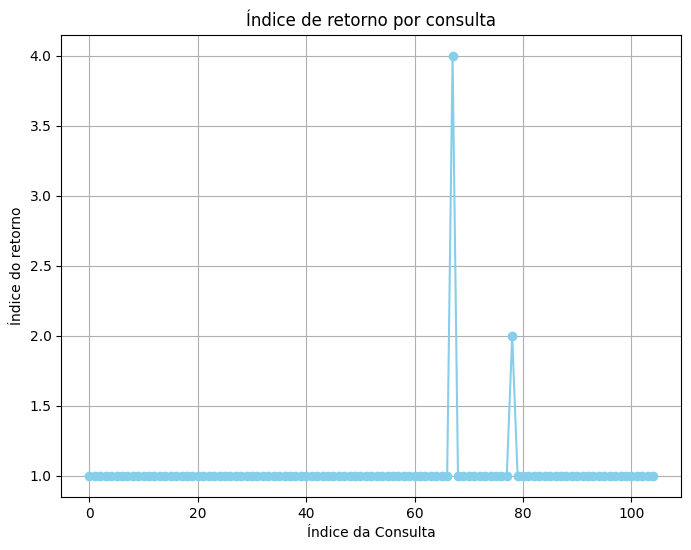

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_two_words):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1]
Quantidade de retornos no top 3: 98


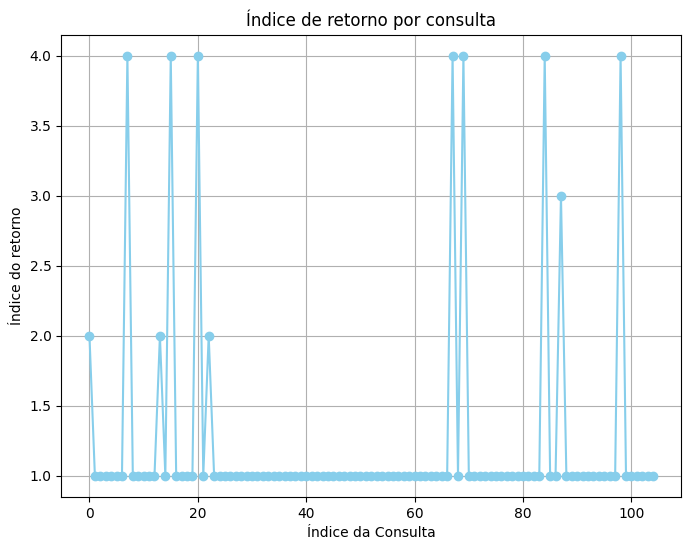

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_three_words):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [2, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 2, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 2, 1, 1, 1]
Quantidade de retornos no top 3: 88


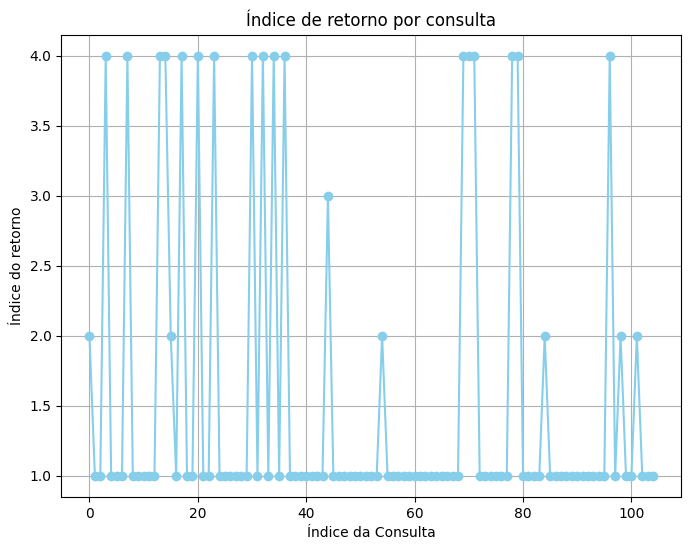

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_four_words):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 1, 2, 1, 1, 4, 1, 3, 4, 1, 1, 1, 1, 4, 4, 4, 2, 1, 4, 1, 4, 2, 2, 1, 4, 1, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 3, 1, 1, 4, 4, 1, 4, 4, 1, 1, 1, 2, 4, 4, 4, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 2, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4]
Quantidade de retornos no top 3: 67


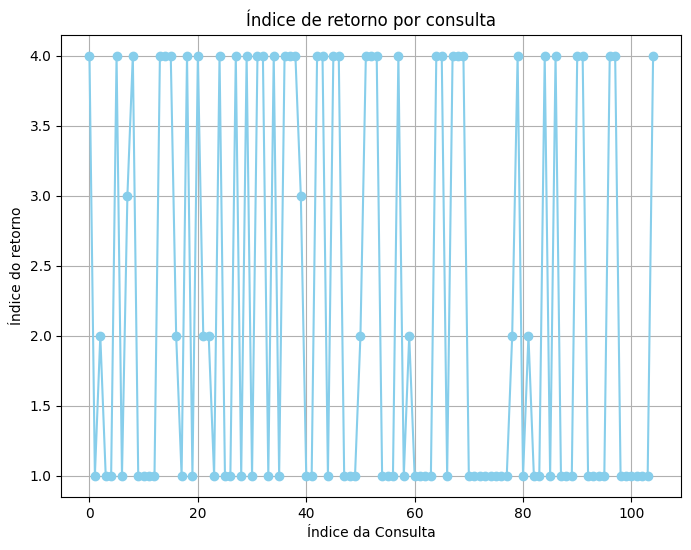

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_five_words):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 1, 4, 1, 4, 3, 1, 4, 3, 2, 4, 4, 1, 4, 1, 4, 4, 4, 2, 1, 4, 1, 3, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 3, 4, 4, 4, 2, 1, 4, 2, 4, 1, 1, 1, 3, 4, 1, 4, 3, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 1, 2, 1, 1, 1, 4, 4, 4, 2, 1, 4, 4, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4]
Quantidade de retornos no top 3: 67


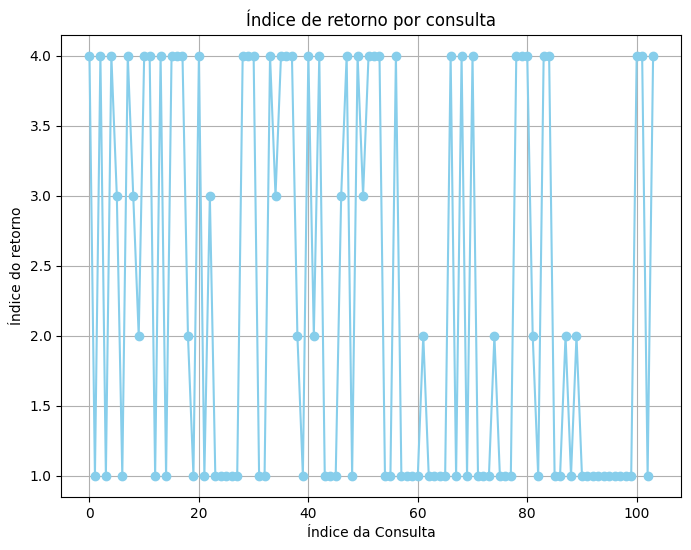

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_six_words):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 4, 1, 1, 4, 2, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 2, 1, 1, 4, 4, 3, 4, 4, 1, 4, 4, 4, 1, 1, 3, 3, 1, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 4, 1, 3, 4, 4, 2, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 1, 4, 3, 4, 1, 4, 1, 1, 4, 4, 4, 4, 1, 1, 4, 4, 1, 4, 1, 1, 4, 3, 4, 1, 4, 4, 4, 2, 4, 1, 1, 4, 1, 1, 1]
Quantidade de retornos no top 3: 48


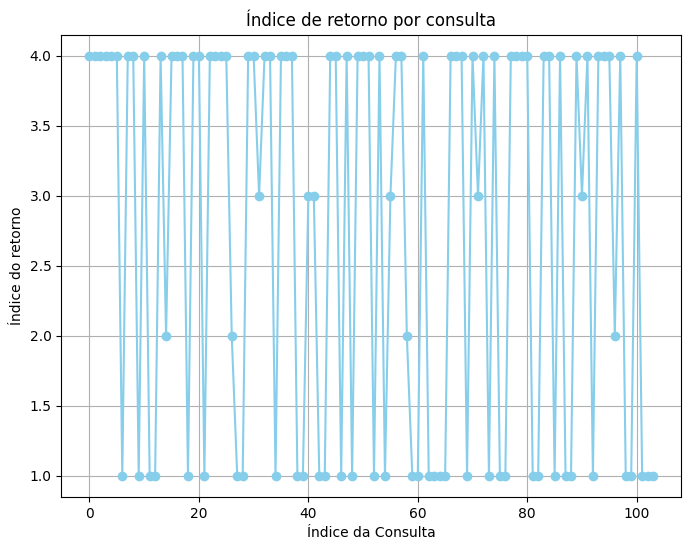

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_seven_words):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 3, 4, 4, 4, 4, 1, 4, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 2, 4, 4, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 4, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 4, 2, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1, 3, 4, 4, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 3, 4, 4, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4]
Quantidade de retornos no top 3: 34


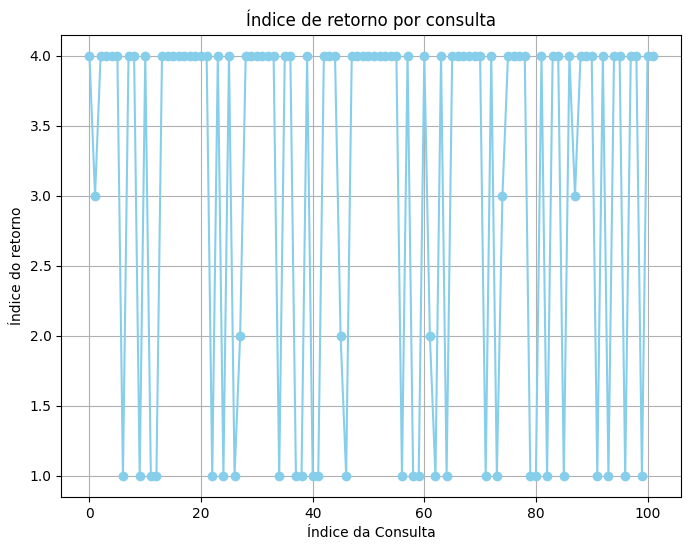

In [ ]:
plot_precision_recall(precisions)

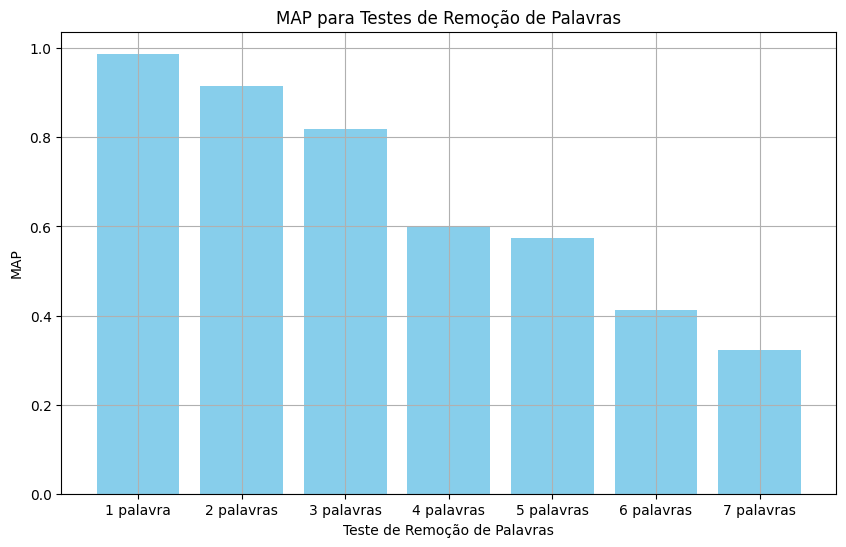

In [ ]:
def find_best_matches_modified(new_reference, original_reference, database_embeddings, database_references):
    new_tokens = preprocess_reference(new_reference)
    new_embedding = get_embeddings(new_tokens)

    # Calcular a similaridade entre a nova referência e o banco de dados
    new_embedding_cpu = new_embedding.cpu().numpy().reshape(1, -1)
    database_embeddings_cpu = database_embeddings.cpu().numpy()

    # Similaridades entre o embedding da nova referência e todos os embeddings do banco de dados
    similarities = cosine_similarity(new_embedding_cpu, database_embeddings_cpu)[0]

    # Obter os índices das maiores similaridades em ordem decrescente
    sorted_indices = similarities.argsort()[::-1]

    # Encontrar a posição da referência original
    posicao = None
    for rank, i in enumerate(sorted_indices):
        # 'i' agora é garantido como um índice inteiro, pois 'sorted_indices' são os índices ordenados
        if database_references[i].lower() == original_reference.lower():
            posicao = rank + 1  # Posição é 1-based (1, 2, 3, ...)
            break

    return posicao


def evaluate_model_modified(consulta_map, database_embeddings, database_references):
    average_precisions = []

    for consulta_modificada, consulta_original in consulta_map.items():
        posicao = find_best_matches_modified(consulta_modificada, consulta_original, database_embeddings, database_references)
        # Calcula a precisão média (Average Precision) para a consulta
        if posicao is not None:
            average_precision = 1 / posicao  # Precisão é inversamente proporcional à posição
            average_precisions.append(average_precision)
        else:
            average_precisions.append(0)  # Se não encontrado, precisão é 0

    # Calcula o MAP (Mean Average Precision) para o conjunto de consultas
    if average_precisions:
        map_value = sum(average_precisions) / len(average_precisions)
    else:
        map_value = 0

    return map_value

# Calcula o MAP para cada teste de remoção de palavras
map_values = []
testes = [test_minus_one_word, test_minus_two_words, test_minus_three_words, test_minus_four_words,
          test_minus_five_words, test_minus_six_words, test_minus_seven_words]

for teste in testes:
    consulta_map = {}
    for original, modificada in zip(first_consults, teste):
        consulta_map[modificada] = original

    map_value = evaluate_model_modified(consulta_map, database_embeddings, database_references)
    map_values.append(map_value)

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(map_values)), map_values, color='skyblue')
plt.xlabel('Teste de Remoção de Palavras')
plt.ylabel('MAP')
plt.title('MAP para Testes de Remoção de Palavras')
plt.xticks(range(len(map_values)), ['1 palavra', '2 palavras', '3 palavras', '4 palavras', '5 palavras', '6 palavras', '7 palavras'])
plt.grid(True)
plt.show()


### Teste com remoção de caracteres

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_one_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Quantidade de retornos no top 3: 105


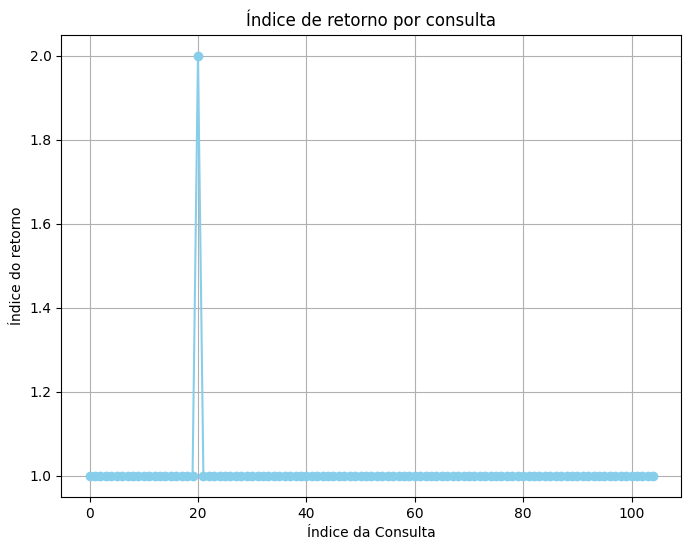

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_two_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1]
Quantidade de retornos no top 3: 101


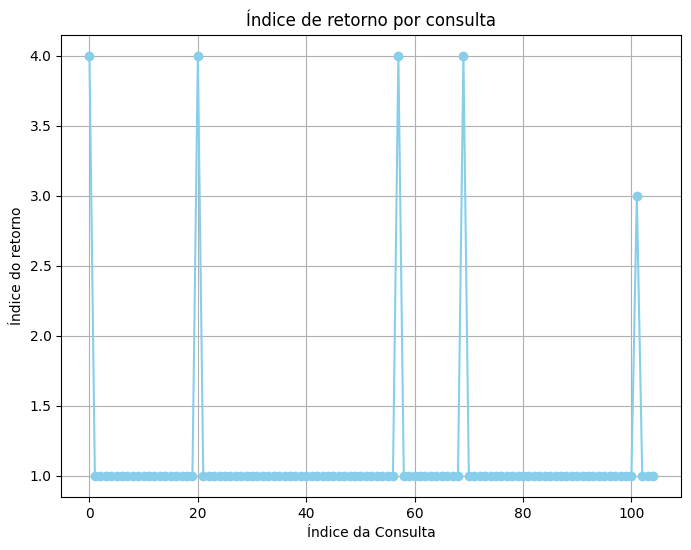

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_three_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 4, 4, 4, 1, 4, 4, 4, 2, 1, 1, 1, 1, 2, 1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Quantidade de retornos no top 3: 89


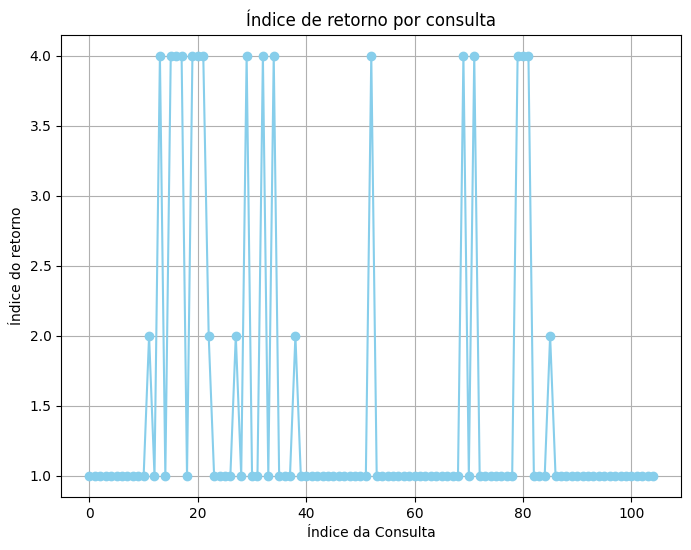

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_four_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 4, 1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1]
Quantidade de retornos no top 3: 81


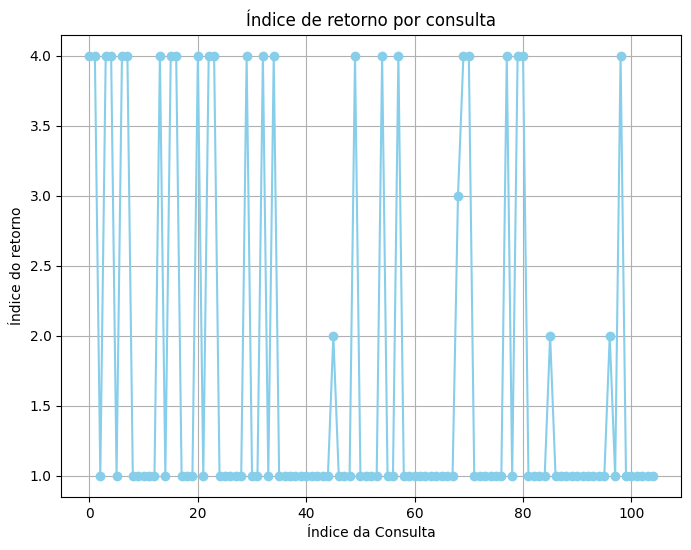

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_five_chars):  # Substitua test_minus_one_word pela lista desejada
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 1, 4, 1, 3, 4, 1, 1, 4, 1, 4, 1, 1, 4, 4, 4, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 4, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 2, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1, 1, 1]
Quantidade de retornos no top 3: 67


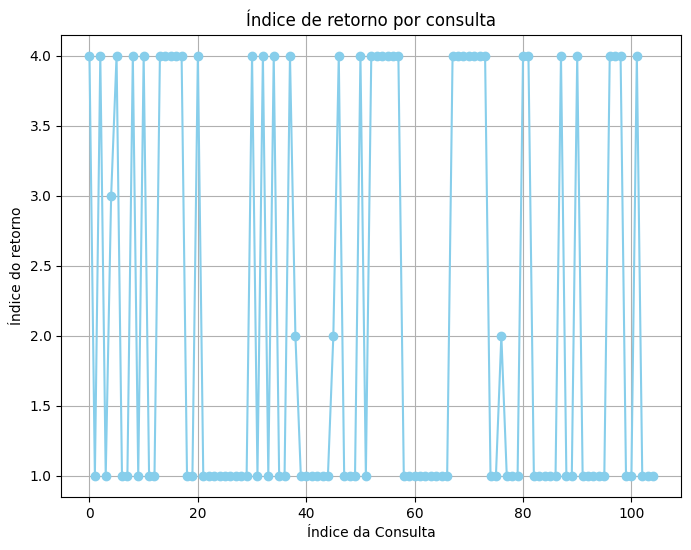

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_minus_six_chars):  # Substitua test_minus_one_word pela lista desejada
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 1, 4, 1, 4, 4, 2, 1, 4, 4, 4, 1, 1, 2, 4, 4, 4, 4, 2, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 4, 4, 4, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 4, 4, 4, 1, 4, 4, 1, 2, 3, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 4, 4, 1, 3, 4, 1, 1, 1]
Quantidade de retornos no top 3: 60


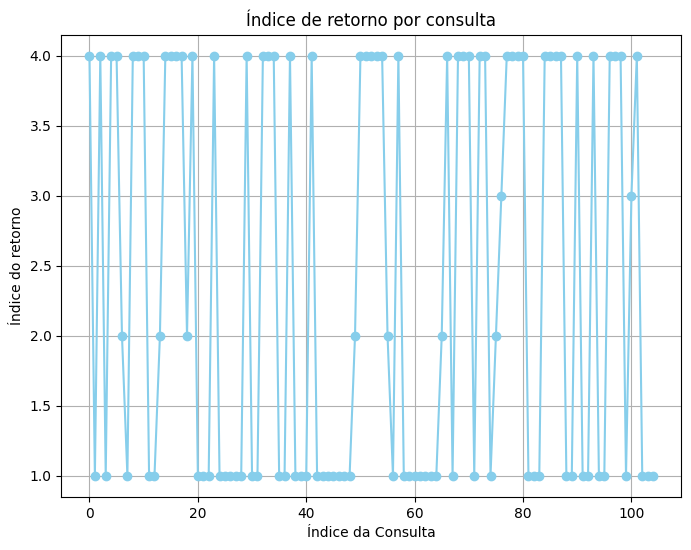

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_change_seven_chars):  # Substitua test_minus_one_word pela lista desejada
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 2, 4, 1, 2, 1, 4, 2, 1, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 2, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4]
Quantidade de retornos no top 3: 27


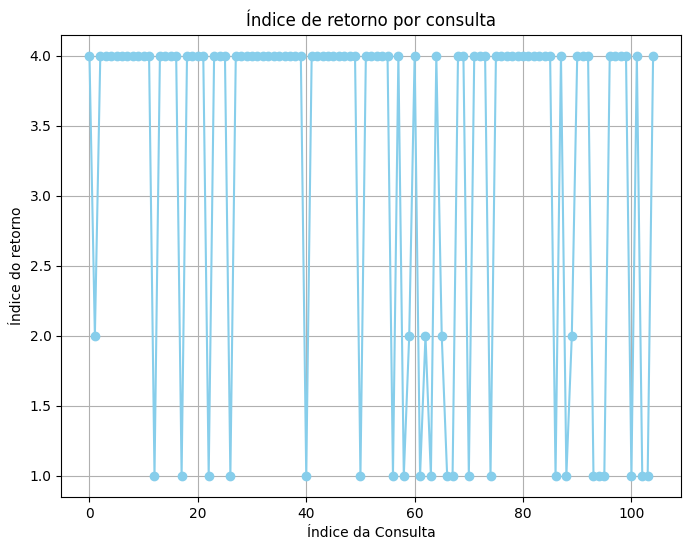

In [ ]:
plot_precision_recall(precisions)

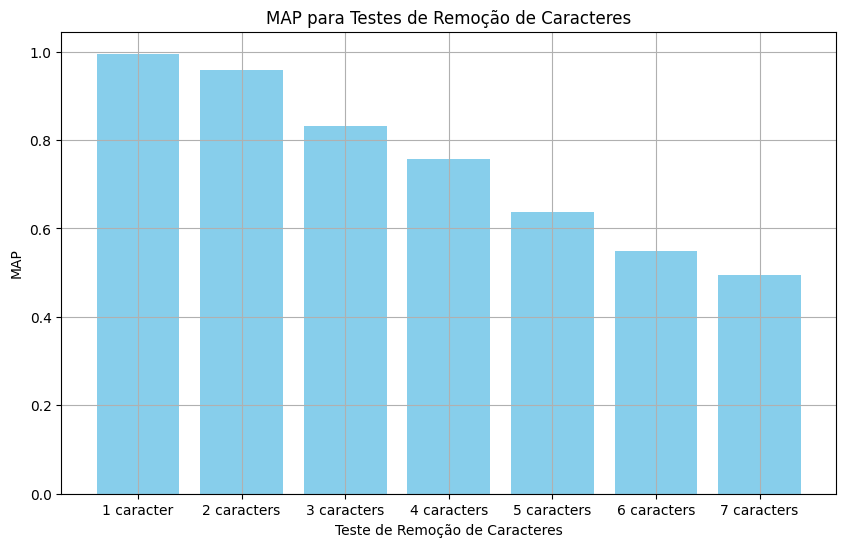

In [ ]:
def find_best_matches_modified(new_reference, original_reference, database_embeddings, database_references):
    new_tokens = preprocess_reference(new_reference)
    new_embedding = get_embeddings(new_tokens)

    # Calcular a similaridade entre a nova referência e o banco de dados
    new_embedding_cpu = new_embedding.cpu().numpy().reshape(1, -1)
    database_embeddings_cpu = database_embeddings.cpu().numpy()

    # Similaridades entre o embedding da nova referência e todos os embeddings do banco de dados
    similarities = cosine_similarity(new_embedding_cpu, database_embeddings_cpu)[0]

    # Obter os índices das maiores similaridades em ordem decrescente
    sorted_indices = similarities.argsort()[::-1]

    # Encontrar a posição da referência original
    posicao = None
    for rank, i in enumerate(sorted_indices):
        # 'i' agora é garantido como um índice inteiro, pois 'sorted_indices' são os índices ordenados
        if database_references[i].lower() == original_reference.lower():
            posicao = rank + 1  # Posição é 1-based (1, 2, 3, ...)
            break

    return posicao


def evaluate_model_modified(consulta_map, database_embeddings, database_references):
    average_precisions = []

    for consulta_modificada, consulta_original in consulta_map.items():
        posicao = find_best_matches_modified(consulta_modificada, consulta_original, database_embeddings, database_references)
        # Calcula a precisão média (Average Precision) para a consulta
        if posicao is not None:
            average_precision = 1 / posicao  # Precisão é inversamente proporcional à posição
            average_precisions.append(average_precision)
        else:
            average_precisions.append(0)  # Se não encontrado, precisão é 0

    # Calcula o MAP (Mean Average Precision) para o conjunto de consultas
    if average_precisions:
        map_value = sum(average_precisions) / len(average_precisions)
    else:
        map_value = 0

    return map_value

# Calcula o MAP para cada teste de remoção de palavras
map_values = []
testes = [test_minus_one_chars, test_minus_two_chars, test_minus_three_chars, test_minus_four_chars,
          test_minus_five_chars, test_minus_six_chars, test_minus_seven_chars]

for teste in testes:
    consulta_map = {}
    for original, modificada in zip(first_consults, teste):
        consulta_map[modificada] = original

    map_value = evaluate_model_modified(consulta_map, database_embeddings, database_references)
    map_values.append(map_value)

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(map_values)), map_values, color='skyblue')
plt.xlabel('Teste de Remoção de Caracteres')
plt.ylabel('MAP')
plt.title('MAP para Testes de Remoção de Caracteres')
plt.xticks(range(len(map_values)), ['1 caracter', '2 caracters', '3 caracters', '4 caracters', '5 caracters', '6 caracters', '7 caracters'])
plt.grid(True)
plt.show()


### Teste com troca de caracteres

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_change_one_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Quantidade de retornos no top 3: 103


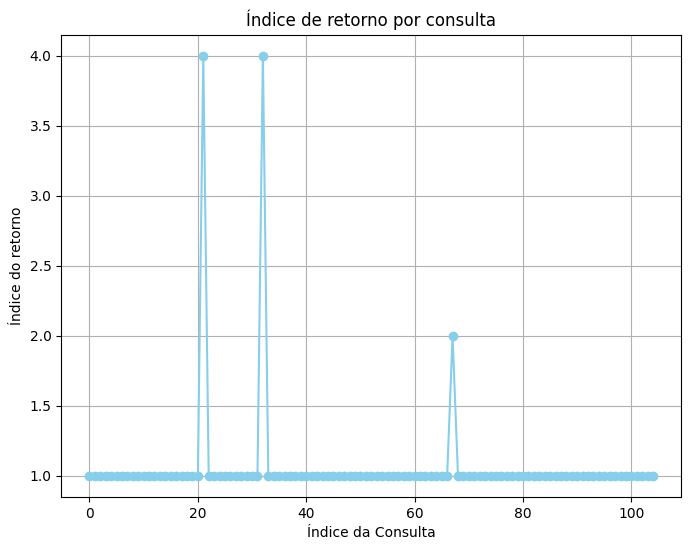

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_change_two_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4]
Quantidade de retornos no top 3: 97


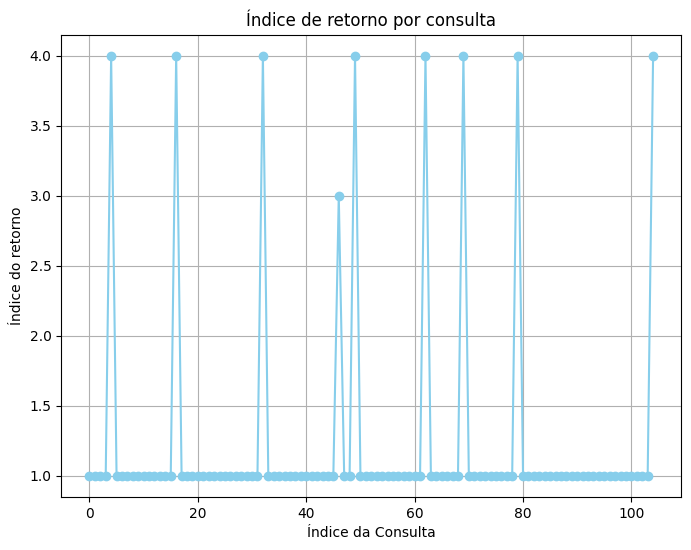

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_change_three_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [1, 3, 1, 4, 4, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 4, 4, 4, 4, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 4, 1, 1, 1, 1, 3, 4, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
Quantidade de retornos no top 3: 88


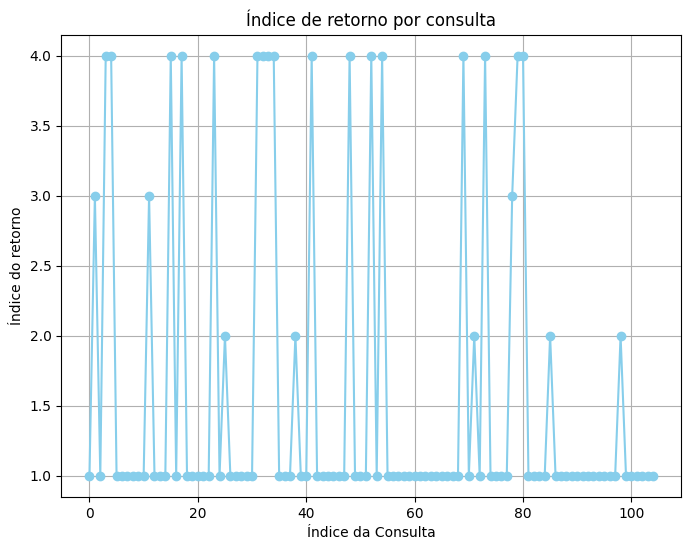

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_change_four_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 2, 4, 2, 1, 1, 1, 4, 1, 4, 1, 1, 4, 4, 4, 1, 4, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 3, 1, 4, 1, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 4, 2, 1, 1, 3, 4, 1, 1, 4, 4, 1, 1, 1, 4, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4]
Quantidade de retornos no top 3: 71


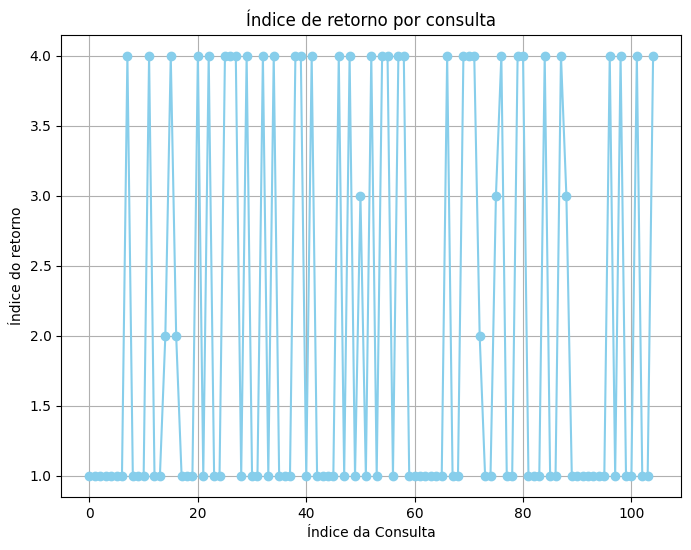

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_change_five_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 1, 2, 1, 4, 4, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 4, 4, 1, 4, 1, 1, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 1, 1, 1, 4, 1, 4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 3, 1, 2, 4, 4, 4, 2, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 3, 1, 4, 1]
Quantidade de retornos no top 3: 47


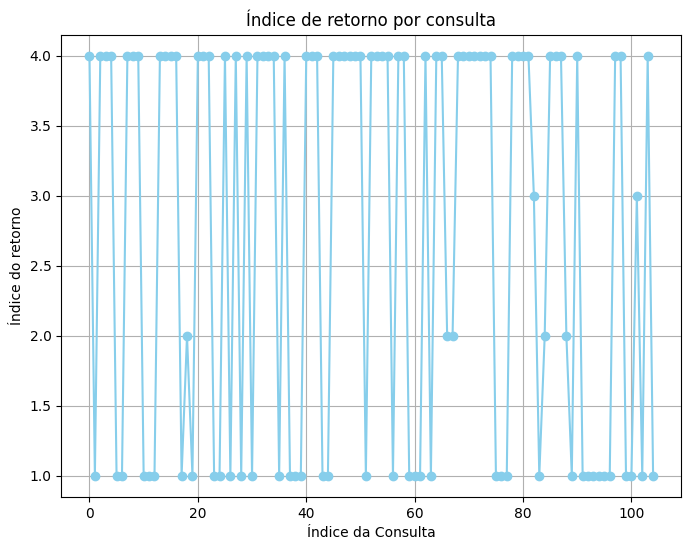

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_change_six_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 3, 2, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 4, 1, 1, 4, 1, 1, 2, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 1, 1, 4, 4, 1, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 4, 3, 4, 1, 3]
Quantidade de retornos no top 3: 34


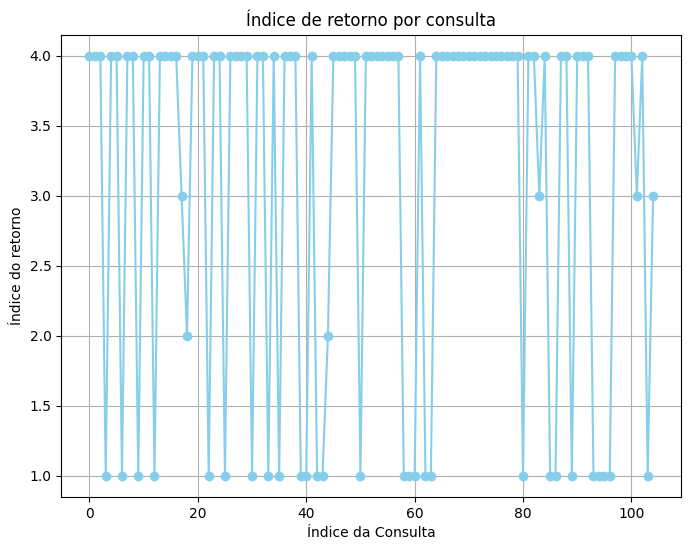

In [ ]:
plot_precision_recall(precisions)

In [ ]:
consulta_map = {}

# Itere sobre as consultas originais e suas versões modificadas
for original, modificada in zip(first_consults, test_change_seven_chars):
    consulta_map[modificada] = original

In [ ]:
# Imprimir os resultados
precisions = evaluate_model(consulta_map, database_embeddings, database_references)
print(f"Precisão: {precisions}")

qtd = 0

for precision in precisions:
  if precision <= 3:
    qtd += 1

print(f"Quantidade de retornos no top 3: {qtd}")

Precisão: [4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 4, 1, 2, 4, 1, 2, 1, 4, 2, 1, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 2, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4, 1, 4, 1, 1, 4]
Quantidade de retornos no top 3: 27


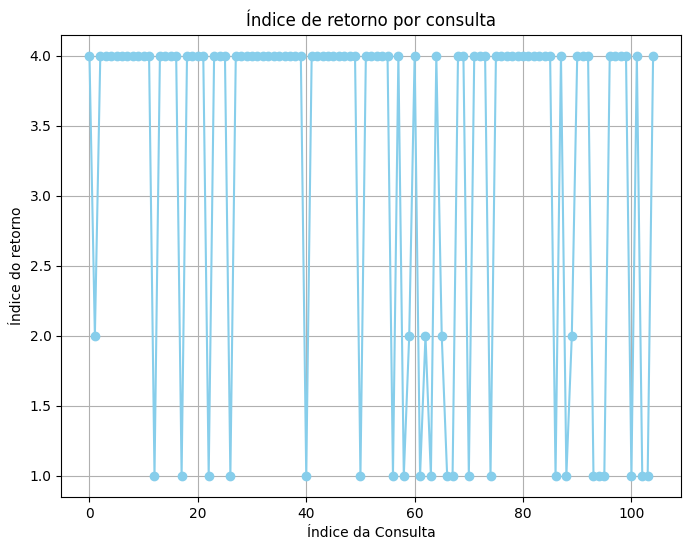

In [ ]:
plot_precision_recall(precisions)

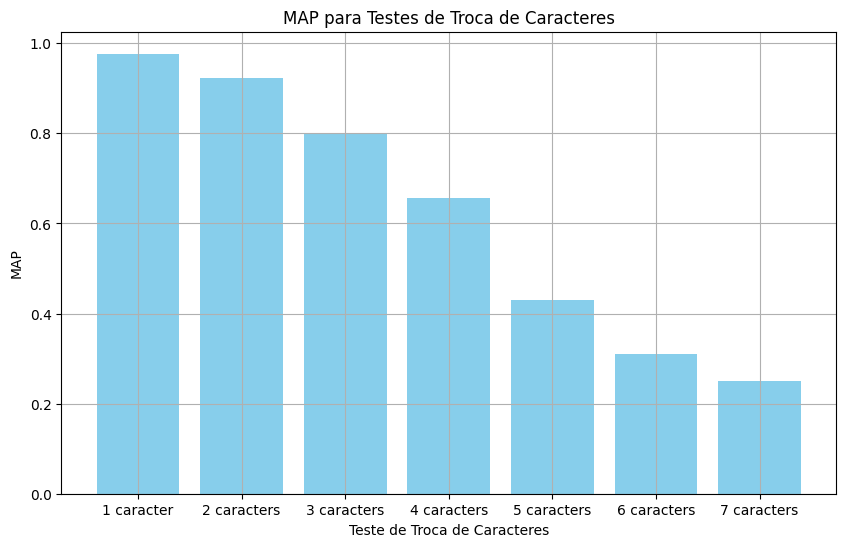

In [ ]:
def find_best_matches_modified(new_reference, original_reference, database_embeddings, database_references):
    new_tokens = preprocess_reference(new_reference)
    new_embedding = get_embeddings(new_tokens)

    # Calcular a similaridade entre a nova referência e o banco de dados
    new_embedding_cpu = new_embedding.cpu().numpy().reshape(1, -1)
    database_embeddings_cpu = database_embeddings.cpu().numpy()

    # Similaridades entre o embedding da nova referência e todos os embeddings do banco de dados
    similarities = cosine_similarity(new_embedding_cpu, database_embeddings_cpu)[0]

    # Obter os índices das maiores similaridades em ordem decrescente
    sorted_indices = similarities.argsort()[::-1]

    # Encontrar a posição da referência original
    posicao = None
    for rank, i in enumerate(sorted_indices):
        # 'i' agora é garantido como um índice inteiro, pois 'sorted_indices' são os índices ordenados
        if database_references[i].lower() == original_reference.lower():
            posicao = rank + 1  # Posição é 1-based (1, 2, 3, ...)
            break

    return posicao


def evaluate_model_modified(consulta_map, database_embeddings, database_references):
    average_precisions = []

    for consulta_modificada, consulta_original in consulta_map.items():
        posicao = find_best_matches_modified(consulta_modificada, consulta_original, database_embeddings, database_references)
        # Calcula a precisão média (Average Precision) para a consulta
        if posicao is not None:
            average_precision = 1 / posicao  # Precisão é inversamente proporcional à posição
            average_precisions.append(average_precision)
        else:
            average_precisions.append(0)  # Se não encontrado, precisão é 0

    # Calcula o MAP (Mean Average Precision) para o conjunto de consultas
    if average_precisions:
        map_value = sum(average_precisions) / len(average_precisions)
    else:
        map_value = 0

    return map_value

# Calcula o MAP para cada teste de remoção de palavras
map_values = []
testes = [test_change_one_chars, test_change_two_chars, test_change_three_chars, test_change_four_chars,
          test_change_five_chars, test_change_six_chars, test_change_seven_chars]

for teste in testes:
    consulta_map = {}
    for original, modificada in zip(first_consults, teste):
        consulta_map[modificada] = original

    map_value = evaluate_model_modified(consulta_map, database_embeddings, database_references)
    map_values.append(map_value)

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(map_values)), map_values, color='skyblue')
plt.xlabel('Teste de Troca de Caracteres')
plt.ylabel('MAP')
plt.title('MAP para Testes de Troca de Caracteres')
plt.xticks(range(len(map_values)), ['1 caracter', '2 caracters', '3 caracters', '4 caracters', '5 caracters', '6 caracters', '7 caracters'])
plt.grid(True)
plt.show()
